<center><h1>Gunadi_Eben_HW5</h1></center>
<br>
<br>

Name: Eben Gunadi
<br>
Github Username: egunadi
<br>
USC ID: 3976793880

## 1. Take the same image as you selected for doing the FFT and the Cosine Transform for previous homework, select a radius of your own choice in the frequency domain

### (a) Display the image.

Import packages

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.fftpack import idct
import pydicom
import os

Get the DICOM image

In [17]:
dicom_file = '../data/dcm/image12.dcm'
dicom_data = pydicom.dcmread(dicom_file)

# Extract pixel array from DICOM
dicom_image = dicom_data.pixel_array

# Save the original image as .png file
if not os.path.exists('../data/png'):
    os.makedirs('../data/png')

plt.imsave('../data/png/image12.png', dicom_image, cmap='gray')

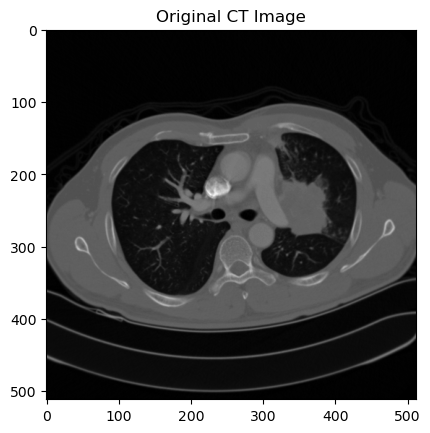

In [18]:
# Plot the image
plt.imshow(dicom_image, cmap='gray')
plt.title('Original CT Image')
plt.show()

### (b) Perform the Cosine Transform & display it.

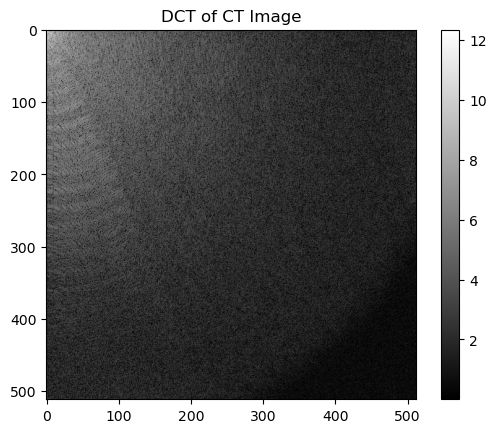

In [19]:
# Perform 2D Discrete Cosine Transform (DCT)
dct_transformed = dct(dct(dicom_image.T, norm='ortho').T, norm='ortho')

# Save the DCT image as .png file
plt.imsave('../data/png/image12_dct.png', np.log(abs(dct_transformed) + 1), cmap='gray')

# Plot the DCT result
plt.imshow(np.log(abs(dct_transformed) + 1), cmap='gray')
plt.title('DCT of CT Image')
plt.colorbar()
plt.show()

### (c) Pick a radius value & delete all frequency components outside of the radius & display it.

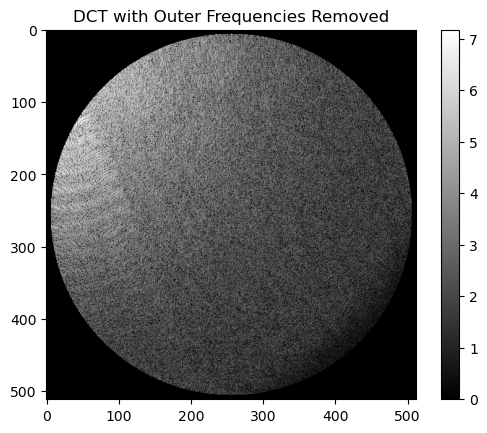

In [42]:
# Pick a radius value
radius = 250

# Create a circular mask directly
h, w = dct_transformed.shape
y, x = np.ogrid[:h, :w]
center = (h // 2, w // 2)
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)
mask = distance_from_center <= radius

# Apply the mask to the DCT-transformed image
dct_transformed_filtered = dct_transformed * mask

# Save and display the masked DCT image (log scale for visualization)
plt.imsave('../data/png/image12_dct_outer_removed.png', np.log(abs(dct_transformed_filtered) + 1), cmap='gray')

plt.imshow(np.log(abs(dct_transformed_filtered) + 1), cmap='gray')
plt.title('DCT with Outer Frequencies Removed')
plt.colorbar()
plt.show()

### (d) Compute the inverse transform & display it.

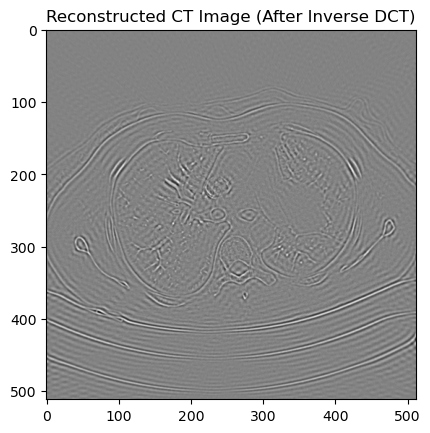

In [43]:
# Perform 2D Inverse Discrete Cosine Transform (IDCT)
dicom_image_filtered = idct(idct(dct_transformed_filtered.T, norm='ortho').T, norm='ortho')

# Save the filtered image as .png file
plt.imsave('../data/png/image12_reconstructed.png', dicom_image_filtered, cmap='gray')

# Plot the filtered image
plt.imshow(dicom_image_filtered, cmap='gray')
plt.title('Reconstructed CT Image (After Inverse DCT)')
plt.show()

### (e) Please comment on the results.

By removing the frequency components outside of the radius, only the high-frequency components (closer to the center of the DCT) were retained. These high-frequency components emphasize edges and sharp details, not the overall structure and broad transitions of the image. This is why the reconstructed image looks like a collection of intricate, fragmented lines. 

### (f) Delete all frequency components inside the radius & display it.

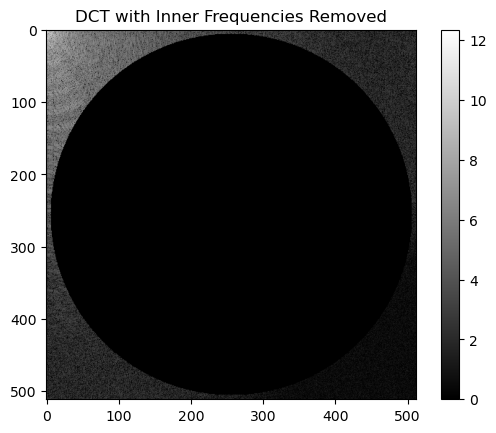

In [44]:
# Create a circular mask for deleting inner frequencies
h, w = dct_transformed.shape
y, x = np.ogrid[:h, :w]
center = (h // 2, w // 2)
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)
mask = distance_from_center > radius  # Change the condition to keep only outer frequencies

# Apply the mask to the DCT-transformed image
dct_transformed_inner_removed = dct_transformed * mask

# Save and display the masked DCT image (log scale for visualization)
plt.imsave('../data/png/image12_dct_inner_removed.png', np.log(abs(dct_transformed_inner_removed) + 1), cmap='gray')

plt.imshow(np.log(abs(dct_transformed_inner_removed) + 1), cmap='gray')
plt.title('DCT with Inner Frequencies Removed')
plt.colorbar()
plt.show()

### (g) Compute the inverse transform & display it.

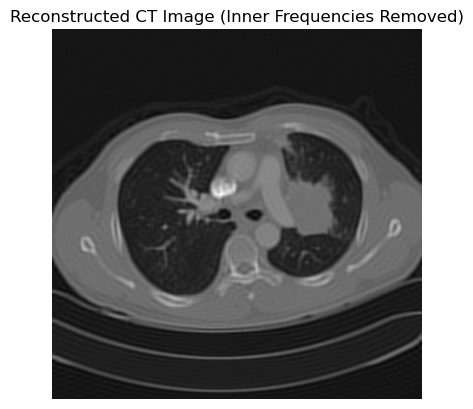

In [45]:
# Perform 2D Inverse Discrete Cosine Transform (IDCT)
dicom_image_inner_removed = idct(idct(dct_transformed_inner_removed.T, norm='ortho').T, norm='ortho')

# Save the filtered image as .png file
plt.imsave('../data/png/image12_inner_removed_reconstructed.png', dicom_image_inner_removed, cmap='gray')

# Plot the filtered image
plt.imshow(dicom_image_inner_removed, cmap='gray')
plt.title('Reconstructed CT Image (Inner Frequencies Removed)')
plt.axis('off')
plt.show()

### (h) Please comment on the results.

By removing the frequency components inside of the radius, the low-frequency components at the top-left corner of the DCT were retained. These low-frequency components emphasize smooth sections and broad transitions, not so much the fine or sharp details of the image. This is why the reconstructed image retains the general structure of the original image, albeit looking slightly smoother or blurrier.

### (i) Give a general short discussion on what you learned from this question.

Although only a small fraction of the DCT, the low-frequency components at the top-left corner are crucial for preserving the overall shape and structure of the image. Conversely, the high-frequency components further from the top-left corner are responsible for the fine or sharp details of the image. By retaining the low-frequency components and removing the high-frequency ones, we can perform image compression while preserving most of the recognizable visual information.

## References and Citations

- https://scikit-image.org/docs/stable/user_guide/install.html